# SMS Spam Classification:Multinomial Naieve Bayes Classifier And Support Vector Machine

## this supervised machine learning model takes a csv of text files containing messages labeled as ham or spam and uses them to train the model and make predictions on new messages



In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.metrics import roc_curve, auc,precision_score, accuracy_score, recall_score, f1_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.svm import SVC
import timeit
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
import string

In [5]:

data_dir = '/Users/carltonbrown/Desktop/Spam Text Classification Data/'
data_file = "SpamRawFIle.csv"


In [6]:
data= pd.read_csv(os.path.join(data_dir, data_file))

In [7]:
def PreProcessing(data):#this function  lowercases all words and removes all punctuation from the text messages

    textMessages =[]
    listx= []

    for i in range(data.shape[0]):#lowers all text and places it in a list
        listx.append(data.iloc[i, :][0])
        listx.append(data.iloc[i, 1].lower())

    T = 0
    while (T != len(listx)):#this loop reformats the text from the list to pair each text message with its label
        textMessages = textMessages + [listx[T:T + 2]]
        T = T + 2
        if (T + 2 == len(listx)):
            textMessages = textMessages + [listx[T:T + 2]]
            break
    punt = list(string.punctuation)
    for x in range(1,len(textMessages)):#this loop removes all punctuation form the text messages

        for character in (textMessages[x][1]):

            if character in punt:
                #print(character)

                textMessages[x][1]=textMessages[x][1].replace(character," ")

    return textMessages


In [8]:
textMessages= PreProcessing(data)

In [ ]:
deVisualize(textMessages):# this function visualizes the data by providing a pie chart and bar graph
    data = pd.DataFrame(np.array(textMessages), columns=['tag', 'text_message']) # creates a data frame from the text messages separating the message tag from the text message
    data['tag'] = data['tag'].apply(lambda x: re.sub(r'(ham)', '0', str(x)))#changes all instances of ham to 0
    data['tag'] = data['tag'].apply(lambda x: re.sub(r'(spam)', '1', str(x)))#changes all instances of spam to 1

    count_Class = pd.value_counts(data['tag'], sort=True) #counts tags
    count_Class.plot(kind='bar', color=["blue", 'orange']) # creates bar graph
    plt.title('Bar chart -\n 0 = non-spam \n 1 = Spam')
    plt.show()
    count_Class.plot(kind='pie', autopct='%1.0f%%')
    plt.title('Pie chart -\n 0 = Non-spam \n 1= Spam') # creates pie chart
    plt.ylabel('')
    plt.show()
    words = " ".join(data[data['tag'] == '0']['text_message']).split()

    r=0

    while (True):#removes single letter words from non
        if r > len(words) - 1:
            break
        if len(words[r]) <= 2:

            words.remove(words[r])
        else:
            r = r + 1
    count1 = Counter(words).most_common(30)#counts top 30 most common words

    df1 = pd.DataFrame.from_dict(count1)
    df1 = df1.rename(columns={0: "words in non-spam", 1: "count"})
    Swords = " ".join(data[data['tag'] == '1']['text_message']).split()

    r = 0
    while (True):#removes single letter words from spam
        if r > len(Swords) - 1:
            break
        if len(Swords[r]) <= 2 :

            Swords.remove(Swords[r])
        else:
            r = r + 1

    count2 = Counter(Swords).most_common(30)#counts top 30 most common words

    df2 = pd.DataFrame.from_dict(count2)
    df2 = df2.rename(columns={0: "words in spam", 1: "count_"})


    df1.plot.bar(legend=False)
    y_pos = np.arange(len(df1["words in non-spam"]))
    plt.xticks(y_pos, df1["words in non-spam"])
    plt.title('Words that are most frequent in non-spam texts')
    plt.xlabel('words')
    plt.ylabel('number')
    plt.show()

    df2.plot.bar(legend=False, color='orange')
    y_pos = np.arange(len(df2["words in spam"]))
    plt.xticks(y_pos, df2["words in spam"])
    plt.title('Words that are most frequent in spam texts')
    plt.xlabel('words')
    plt.ylabel('number')
    plt.show()





In [26]:
def MNaieveBayes_(textMessages):


    df = pd.DataFrame(np.array(textMessages), columns=['tag', 'text_message'])
    print(df)


    df['tag'] = df['tag'].apply(lambda x: re.sub(r'(ham)', '0', str(x)))#changes ham tags to 0
    df['tag'] = df['tag'].apply(lambda x: re.sub(r'(spam)', '1', str(x)))# changes spam tags to 1
    print(df.head)
    #df.to_csv("/Users/carltonbrown/Desktop/Data/ProcessedSpamraw.csv") converts processed data to csv


    x_train, x_test, y_train, y_test = train_test_split(df['text_message'], df['tag'], random_state=1,train_size=.33)#creates training data

    start = timeit.default_timer()#used for timing the code

    count = 0

    count_vector = CountVectorizer(stop_words='english')# initializes a count vectorizer that will deal with English stop words
    AlphaVals = np.arange(1 / 100000, 20, 0.10)

    ACCscore = np.zeros(len(AlphaVals))#creates array to store accuracy scores for each alpha value used
    recall = np.zeros(len(AlphaVals))#creates array to store recall scores for each alpha value used
    f1_scorex = np.zeros(len(AlphaVals))#creates array to store f1 scores for each alpha value used
    precision = np.zeros(len(AlphaVals))#creates array to store precision scores for each alpha value used
    RocAuc = np.zeros(len(AlphaVals))#creates array to store roc auc scores for each alpha value used
    training = count_vector.fit_transform(x_train)# converts all training data text messages to vectors that the model can read
    testing = count_vector.transform(x_test)# converts all testing data text messages to vectors that the model can read
    for alpha in AlphaVals:#used for trying out various alpha values for alpha parameter of Naive Bayes
        naive_bayes = MultinomialNB(alpha=alpha)#creates Naive Bayes model with an alpha value from the AlphaVals array
        naive_bayes.fit(training, y_train)#fits train data
        predictions = naive_bayes.predict(testing)
        ACCscore[count] = accuracy_score(y_test, predictions)*100 #adds accuracy scores to array
        RocAuc[count] = roc_auc_score(y_test, predictions) * 100 #adds roc auc scores to array
        recall[count] = recall_score(y_test, predictions, pos_label="0")*100 #adds recall scores to array
        f1_scorex[count] = f1_score(y_test, predictions, pos_label="0")*100  #adds f1 scores to array
        precision[count] = precision_score(y_test, predictions, pos_label="0")*100 #adds precision scores to array
        count = count + 1

    matrix = np.matrix(np.c_[AlphaVals, f1_scorex, ACCscore, recall, precision,RocAuc])
    models = pd.DataFrame(data=matrix, columns=['alpha', 'f1_score','Accuracy', 'Recall', 'Precision','RocAuc'])#creates data frame from all scores and alpha values
    print(models.head(n=16))
    best_index = models['f1_score'].idxmax()#Finds highest f1 score in the dataframe
    print("best f1 score")
    print(models.iloc[best_index, :])
    bestF1_floor = int(models['f1_score'].max())#takes the floor value of best f1 score

    best_index = models[models['f1_score'] >= bestF1_floor]['Accuracy'].idxmax()#searches for the highest f1 score accuracy score combination
    print(best_index)

    naive_bayes = MultinomialNB(alpha=AlphaVals[best_index])# initializes a Naive Bayes model with an alpha value that gives the best scores
    naive_bayes.fit(training, y_train)
    print()
    print("Here is the  best model and results for this classification")
    print(models.iloc[best_index, :])
    m_confusion_test = metrics.confusion_matrix(y_test, naive_bayes.predict(testing))
    print("confusion matrix")
    print(pd.DataFrame(data=m_confusion_test, columns=['Predicted to be non-spam', 'Predicted to be Spam'],
                 index=['Actually non-spam', 'Actually Spam']))# prints confusion test

    stop = timeit.default_timer()

    print('Time: ', stop - start)
    MyText = input("Would you like to enter your own text for prediction using the Multionomial Naieve Bayes Classifier? (Y/N)")
    if MyText =="N"or MyText=="n":
        return
    while(True):
        UserTexts = []
        MyText = input("Enter a text message for classfication: ")
        UserTexts.append(MyText)
        doc_term_matrix = count_vector.transform(UserTexts)
        print(naive_bayes.predict(doc_term_matrix))
        result = naive_bayes.predict(doc_term_matrix)
        if result[0] == '1':
            print("the text \"" + UserTexts[0] + "\"" + " is most likely spam")
        else:
            print("the text \"" + UserTexts[0] + "\"" + " is most likely not spam")
        # xxxxx
        MyText = input("do you have another message for classification? (Y/N)")
        if MyText =="N"or MyText=="n":
            break
 










In [34]:

def SVM_(textMessages):

    df = pd.DataFrame(np.array(textMessages), columns=['tag', 'text_message'])

    df['tag'] = df['tag'].apply(lambda x: re.sub(r'(ham)', '0', str(x)))#changes all instances of ham in tags to 0
    df['tag'] = df['tag'].apply(lambda x: re.sub(r'(spam)', '1', str(x)))#changes all instances of spam in tags to 0
    print(df.head)

    x_train, x_test, y_train, y_test = train_test_split(df['text_message'], df['tag'], random_state=1,train_size=.33)











    start = timeit.default_timer()
    CVals = np.arange(100, 400,12)#creates array of values to use for C parameter
    print(CVals)
    ACCscore = np.zeros(len(CVals))#creates array to store accuracy scores for each c value used
    recall = np.zeros(len(CVals))#creates array to store recall scores for each c value used
    precision = np.zeros(len(CVals))#creates array to store precision scores for each c value used
    f1_scorex = np.zeros(len(CVals))#creates array to store f1 scores for each c value used
    RocAuc = np.zeros(len(CVals))#creates array to store roc aucscores for each c value used
    count = 0
    count_vector = CountVectorizer(stop_words='english')# initializes a count vectorizer that will deal with English stop words
    training = count_vector.fit_transform(x_train)# converts all training data text messages to vectors that the model can read
    testing = count_vector.transform(x_test)# converts all testing data text messages to vectors that the model can read

    for C in CVals:

        SVM = svm.SVC(C=C)
        SVM.fit(training, y_train)
        predictions = SVM.predict(testing)
        ACCscore[count] = accuracy_score(y_test, predictions) * 100 #adds accuracy scores to array
        recall[count] = recall_score(y_test, predictions, pos_label="0") * 100 #adds recall scores to array
        f1_scorex[count] = f1_score(y_test, predictions, pos_label="0") * 100 #adds f1 scores to array
        precision[count] = precision_score(y_test, predictions, pos_label="0") * 100 #adds precision scores to array
        RocAuc[count] = roc_auc_score(y_test, predictions) * 100 #adds roc auc scores to array
        count = count + 1

    matrix = np.matrix(np.c_[CVals,f1_scorex, ACCscore, recall, precision,RocAuc])
    models = pd.DataFrame(data=matrix, columns=['C', 'f1 score', 'Accuracy', 'Recall', 'Precision','RocAuc'])
    print(models.head(n=16))
    best_index = models['f1 score'].idxmax()#Finds highest f1 score in the dataframe
    
    

    bestF1_floor = int(models['f1 score'].max())#takes the floor value of best f1 score

    best_index = models[models['f1 score'] >= bestF1_floor]['Accuracy'].idxmax()#searches for the highest f1 score accuracy score combination

    SVM = svm.SVC(C=CVals[best_index])# initializes an svm with the c parameter that gave the best scores
    SVM.fit(training, y_train)
    m_confusion_test = metrics.confusion_matrix(y_test, SVM.predict(testing))
    print("confusion matrix")
    print(pd.DataFrame(data=m_confusion_test, columns=['Predicted to be non-spam', 'Predicted to be Spam'],
                       index=['Actually non-spam', 'Actually Spam']))# prints a confusion matrix
    print("Here is the  best model and results for this classification")
    print(models.iloc[best_index, :])

    stop = timeit.default_timer()

    print('Time: ', stop - start)
  

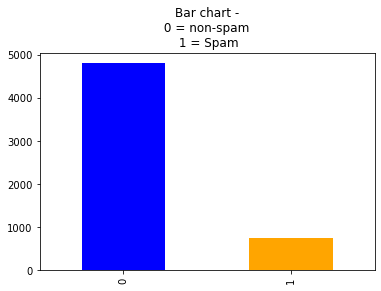

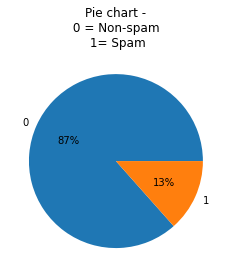

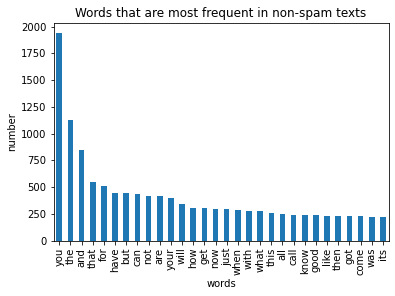

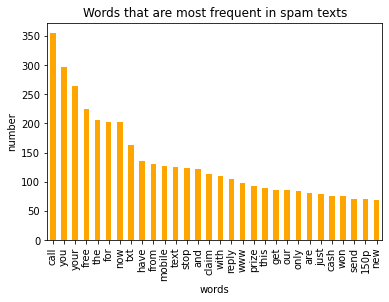

In [12]:


Visualize(textMessages)




In [36]:
MNaieveBayes_(textMessages)

       tag                                       text_message
0      ham  hope you are having a good week. just checking in
1      ham                            k  give back my thanks 
2      ham        am also doing in cbe only  but have to pay 
3     spam  complimentary 4 star ibiza holiday or £10 000 ...
4     spam  okmail  dear dave this is your final notice to...
...    ...                                                ...
5554   ham  you are a great role model  you are giving so ...
5555   ham  awesome  i remember the last time we got someb...
5556  spam  if you don t  your prize will go to another cu...
5557  spam  sms  ac jsco  energy is high  but u may not kn...
5558   ham                    shall call now dear having food

[5559 rows x 2 columns]
<bound method NDFrame.head of      tag                                       text_message
0      0  hope you are having a good week. just checking in
1      0                            k  give back my thanks 
2      0        am al

Would you like to enter your own text for prediction using the Multionomial Naieve Bayes Classifier? (Y/N) Y
Enter a text message for classfication:  Hey did you finish building that machine learning model for sms classification already?


['0']
the text "Hey did you finish building that machine learning model for sms classification already?" is most likely not spam


do you have another message for classification? (Y/N) Y
Enter a text message for classfication:  / - / T H A N K   Y O U ! 1 0 0 B u c k s   F O R #678xxxxx  --https:/Wln::http://18441962 91////gl. php  Send 0 to STOP ==


['1']
the text "/ - / T H A N K   Y O U ! 1 0 0 B u c k s   F O R #678xxxxx  --https:/Wln::http://18441962 91////gl. php  Send 0 to STOP ==" is most likely spam


do you have another message for classification? (Y/N) N


In [37]:
SVM_(textMessages)

<bound method NDFrame.head of      tag                                       text_message
0      0  hope you are having a good week. just checking in
1      0                            k  give back my thanks 
2      0        am also doing in cbe only  but have to pay 
3      1  complimentary 4 star ibiza holiday or £10 000 ...
4      1  okmail  dear dave this is your final notice to...
...   ..                                                ...
5554   0  you are a great role model  you are giving so ...
5555   0  awesome  i remember the last time we got someb...
5556   1  if you don t  your prize will go to another cu...
5557   1  sms  ac jsco  energy is high  but u may not kn...
5558   0                    shall call now dear having food

[5559 rows x 2 columns]>
[100 112 124 136 148 160 172 184 196 208 220 232 244 256 268 280 292 304
 316 328 340 352 364 376 388]
        C   f1 score   Accuracy     Recall  Precision     RocAuc
0   100.0  97.956071  96.402685  99.906658  96.080192  8